<a href="https://colab.research.google.com/github/fengfrankgthb/BUS-41204/blob/main/Reinforcement%20Learning/Multi_Armed_Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Code: https://github.com/ankonzoid/LearningX/blob/master/classical_RL/multiarmed_bandit/multiarmed_bandit.py

The code below has helpful comments

Running multi-armed bandits with nActions = 10, eps = 0.1
[Experiment 50/5000] n_steps = 500, reward_avg = 0.6
[Experiment 100/5000] n_steps = 500, reward_avg = 0.716
[Experiment 150/5000] n_steps = 500, reward_avg = 0.634
[Experiment 200/5000] n_steps = 500, reward_avg = 0.772
[Experiment 250/5000] n_steps = 500, reward_avg = 0.742
[Experiment 300/5000] n_steps = 500, reward_avg = 0.718
[Experiment 350/5000] n_steps = 500, reward_avg = 0.682
[Experiment 400/5000] n_steps = 500, reward_avg = 0.734
[Experiment 450/5000] n_steps = 500, reward_avg = 0.776
[Experiment 500/5000] n_steps = 500, reward_avg = 0.648
[Experiment 550/5000] n_steps = 500, reward_avg = 0.666
[Experiment 600/5000] n_steps = 500, reward_avg = 0.674
[Experiment 650/5000] n_steps = 500, reward_avg = 0.708
[Experiment 700/5000] n_steps = 500, reward_avg = 0.668
[Experiment 750/5000] n_steps = 500, reward_avg = 0.672
[Experiment 800/5000] n_steps = 500, reward_avg = 0.668
[Experiment 850/5000] n_steps = 500, reward_avg =

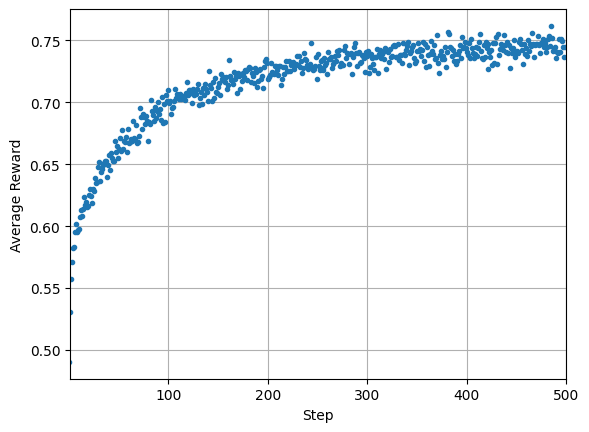

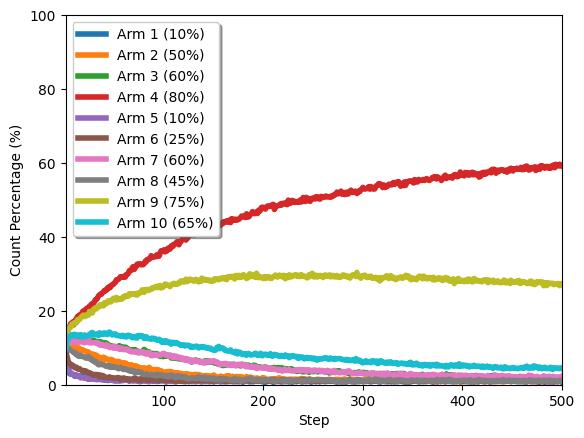

In [4]:
"""

 multiarmed_bandit.py  (author: Anson Wong / git: ankonzoid)

 We solve the multi-armed bandit problem using a classical epsilon-greedy
 agent with reward-average sampling as the estimate to action-value Q.
 This algorithm follows closely with the notation of Sutton's RL textbook.

 We set up bandit arms with fixed probability distribution of success,
 and receive stochastic rewards from each arm of +1 for success,
 and 0 reward for failure.

 The incremental update rule action-value Q for each (action a, reward r):
   n += 1
   Q(a) <- Q(a) + 1/n * (r - Q(a))

 where:
   n = number of times action "a" was performed
   Q(a) = value estimate of action "a"
   r(a) = reward of sampling action bandit (bandit) "a"

 Derivation of the Q incremental update rule:
   Q_{n+1}(a)
   = 1/n * (r_1(a) + r_2(a) + ... + r_n(a))
   = 1/n * ((n-1) * Q_n(a) + r_n(a))
   = 1/n * (n * Q_n(a) + r_n(a) - Q_n(a))
   = Q_n(a) + 1/n * (r_n(a) - Q_n(a))

"""
import os
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

class Environment:
    """This is a simulated environment.
    In reality for model-free tasks, we would interact with a real environment
    """

    def __init__(self, probs):
       # Success probabilities for each arm.
       # In practice, we don't know these values. We want to find them.
        self.probs = probs

    def step(self, action):
        # Pull arm and get stochastic reward (1 for success, 0 for failure)
        return 1 if (np.random.random()  < self.probs[action]) else 0

class Agent:

    def __init__(self, nActions, eps):
        self.nActions = nActions # Number of actions
        self.eps = eps # probability of exploration vs exploitation.
        self.n = np.zeros(nActions, dtype=int) # action counts n(a)
        self.Q = np.zeros(nActions, dtype=np.float64) # value Q(a)

    def update_Q(self, action, reward):
        # Update Q action-value given (action, reward)
        self.n[action] += 1
        # A computation efficient strategy to store the value function.
        # This is the average cumilative reward per action
        self.Q[action] += (1.0/self.n[action]) * (reward - self.Q[action])

    def get_action(self):
        # Epsilon-greedy policy
        if np.random.random() < self.eps: # explore
            return np.random.randint(self.nActions)
        else: # exploit
            return np.random.choice(np.flatnonzero(self.Q == self.Q.max()))


def experiment(probs, N_episodes):
    """Start multi-armed bandit simulation"""
    env = Environment(probs) # initialize arm probabilities
    agent = Agent(len(env.probs), eps)  # initialize agent
    actions, rewards = [], []
    for episode in range(N_episodes):
        action = agent.get_action() # sample policy # integer correcponding to the arm taken.
        reward = env.step(action) # take step + get reward # integer 0/1
        agent.update_Q(action, reward) # update Q
        actions.append(action) # list of ints
        rewards.append(reward) # list of ints
    return np.array(actions), np.array(rewards) # 500 x 1, 500 x 1

# Settings
probs = [0.10, 0.50, 0.60, 0.80, 0.10,
         0.25, 0.60, 0.45, 0.75, 0.65] # bandit arm probabilities of success
# This is the ground truth we don't know initially.
N_steps = 500 # number of steps (per episode)
N_experiments = 5_000 # number of experiments to perform
eps = 0.1 # probability of random exploration (fraction)
save_fig = True # save file in same directory
output_dir = os.path.join(os.getcwd(), "output")

# Run multi-armed bandit experiments
print("Running multi-armed bandits with nActions = {}, eps = {}".format(len(probs), eps))
R = np.zeros((N_steps,))  # reward history sum. 500 x 1
A = np.zeros((N_steps, len(probs)))  # action history sum 500 x 10
for i in range(N_experiments):
    actions, rewards = experiment(probs, N_steps)  # perform experiment. actions = 500x1, rewards = 500x1
    if (i + 1) % (N_experiments / 100) == 0:
        print("[Experiment {}/{}] ".format(i + 1, N_experiments) +
              "n_steps = {}, ".format(N_steps) +
              "reward_avg = {}".format(np.sum(rewards) / len(rewards)))
    R += rewards # Adding rewards for every time step across all experiments: 500x1
    for j, a in enumerate(actions):
        # step_index x num_actions = 500 x 10.
        # Each cell holds number of actions a in time step j across all experiments
        A[j][a] += 1

# Plot reward results

# 500 x 1 - each cell is average reward per timestep across all experiments.
# Ideally this increases on average over time as the agent learns. Check rewards.png.
R_avg =  R / np.float64(N_experiments)
plt.plot(R_avg, ".")
plt.xlabel("Step")
plt.ylabel("Average Reward")
plt.grid()
ax = plt.gca()
plt.xlim([1, N_steps])
if save_fig:
    if not os.path.exists(output_dir): os.mkdir(output_dir)
    plt.savefig(os.path.join(output_dir, "rewards.png"), bbox_inches="tight")
    plt.show()  # originally missing from ajhalthor's code
else:
    plt.show()
plt.close()

# Plot action results
for i in range(len(probs)):
    A_pct = 100 * A[:,i] / N_experiments # num_steps x 1 = 500 x 1
    # Each cell is number of times the action i was selected for time step j across all experiments /  number of experiments conducted
    steps = list(np.array(range(len(A_pct)))+1) # [0, 1, 2, 3 , 4, ..., 500]
    # Plotting line chart for just 1 action i at a time.
    plt.plot(steps, A_pct, "-",
             linewidth=4,
             label="Arm {} ({:.0f}%)".format(i+1, 100*probs[i])) # Incrementing Arm + 1 as they start with 0 index
    # We should ideally see as timesteps go on, the slot with the largest probability of success is chosen the most.
    # check actions.png
plt.xlabel("Step")
plt.ylabel("Count Percentage (%)")
leg = plt.legend(loc='upper left', shadow=True)
plt.xlim([1, N_steps])
plt.ylim([0, 100])

# Get legend handles and labels
handles, labels = leg.axes.get_legend_handles_labels()
# Iterate through the handles and set linewidth
for legobj in handles:
    legobj.set_linewidth(4.0)

if save_fig:
    if not os.path.exists(output_dir): os.mkdir(output_dir)
    plt.savefig(os.path.join(output_dir, "actions.png"), bbox_inches="tight")
    plt.show() # originally missing from ajhalthor's code
else:
    plt.show()
plt.close()